### Introduction
The following notebook shows how to implement a three node neural network that computes XNOR gate. It is based on Andrew Ng's Lecture 8 of Machine Leaning course.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

### Creating a logical AND neuron

As Andrew Ng shows, a one cell logical neuron cell can be constructed to emulate a logical AND operation. We wish it to output 0 for (0, 0), (0, 1), and (1, 0) values and 1 for (1, 1). This can be achieved as follows:
$$
h_{\theta}(x) = g(-30 + 20x_1 + 20x_2)
$$
Where $g(x) = 1/(1 + e^{-x})$.

Let us construct it. We create a function that takes _theta_, a vector of $\Theta$ values, and $x_1$ and $x_2$. We use the vector to create three constants. The first one is the bias unit. The next two are used to multiply $x_1$ and $x_2$, respectively. The expression is then fed into a sigmoid function, implemented by `tf.nn.sigmoid`.

Outside of the function we are going to create two placeholders. For tensorflow a placeholder is an operation that is fed data from the outside. These are going to be our $x_1$ and $x_2$ variables. Next we create a `h_and` operation by calling the `MakeModel` function with $\Theta$ parameters as suggested by Andrew Ng.

In [2]:
def MakeModel(theta, x1, x2):
    h = tf.constant(theta[0]) + tf.constant(theta[1]) * x1 + tf.constant(theta[2]) * x2
    return tf.nn.sigmoid(h)

x1 = tf.placeholder(tf.float32, name="x1")
x2 = tf.placeholder(tf.float32, name="x2")
h_and = MakeModel([-30.0, 20.0, 20.0], x1, x2)

We can then print the values to verify that our model works correctly. When creating tensorflow operations, we do not create an actual program. Instead, we create a description of the program. To execute it, we need to create a session and ask it to run our computation graph

In [3]:
with tf.Session() as sess:
    print " x1 | x2 |  g"
    print "----+----+-----"
    for x in range(4):
        x1_in, x2_in = x & 1, x > 1
        print " %2.0f | %2.0f | %3.1f" % (x1_in, x2_in, sess.run(h_and, {x1: x1_in, x2: x2_in}))

 x1 | x2 |  g
----+----+-----
  0 |  0 | 0.0
  1 |  0 | 0.0
  0 |  1 | 0.0
  1 |  1 | 1.0


In [4]:
def PlotValues(span, vals):
    fig = plt.figure(figsize=(10, 8))
    xv, yv = np.meshgrid(span, span)
    ax = fig.gca(projection='3d')
    cset = ax.contourf(xv, yv, vals, zdir='z', offset=span.min() - 0.3, cmap=cm.coolwarm)
    cset = ax.contourf(xv, yv, vals, zdir='x', offset=span.min() - 0.1, cmap=cm.coolwarm)
    cset = ax.contourf(xv, yv, vals, zdir='y', offset=span.max() + 0.1, cmap=cm.coolwarm)
    ax.plot_surface(xv, yv, vals, cmap=cm.coolwarm)

    ax.set_xlabel('x1')
    ax.set_xlim(span.min() - 0.1, span.max())
    ax.set_ylabel('y1')
    ax.set_ylim(span.min(), span.max() + 0.1)
    ax.set_zlabel('h')
    ax.set_zlim(span.min() - 0.3, span.max() + 0.1)

    plt.show()
    
def ComputeVals(h, span):
    vals = []
    with tf.Session() as sess:
        for x1_in in span:
            vals.append([
                sess.run(h, feed_dict={x1: x1_in, x2: x2_in}) for x2_in in span
            ])
    return vals

In [5]:
span = np.linspace(0, 1, 20)
and_vals = ComputeVals(h_and, span)

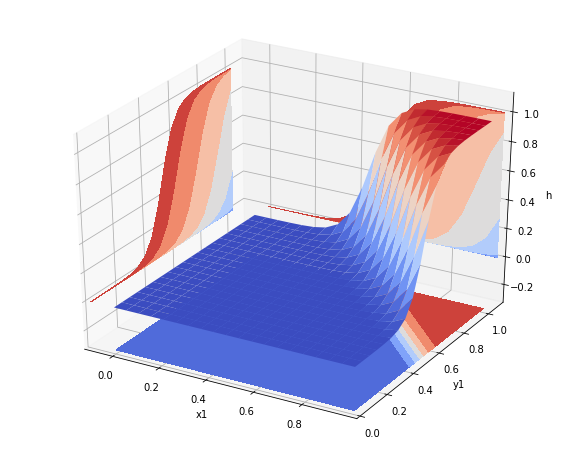

In [6]:
PlotValues(span, and_vals)

### Creating a logical OR neuron
Having created a logical AND, let us create a logical OR neuron. Andrew Ng tells us that a logical OR can be created by feeding $20 x_1 + 20 x_2 - 10$ into the sigmoid function. We are re-using earlier declared placeholders, $x_1$, and $x_2$.

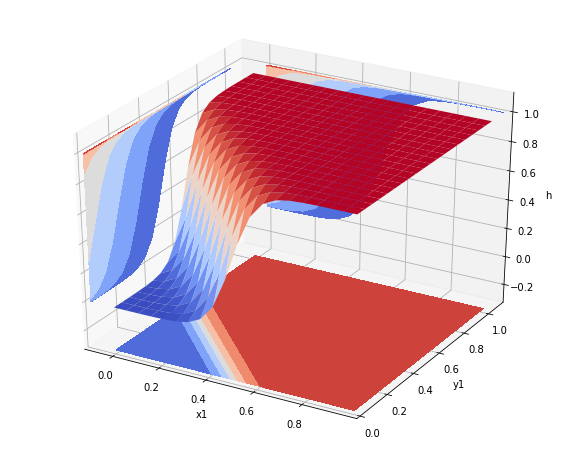

In [7]:
h_or = MakeModel([-10.0, 20.0, 20.0], x1, x2)
or_vals = ComputeVals(h_or, span)
PlotValues(span, or_vals)

### Creating a logical NOR neuron
The negation can be crated by putting a large negative weight in front of the variable. Andrew Ng's chose $10 - 20x$. This way $g(x) = 1/(1 + e^{-(10 - 20x)})$ takes value $0.00005$ for $x_1 = 1$ and $0.99995$ for $x_1 = 0$. By using $-20$ with both $x_1$ and $x_2$ we get a neuron that produces logical AND of negation of $x_1$ and negation of $x_2$, also known as NOR:
$$
h\text{_nand}= {1 \over 1 + e^{-(10 - 20x_1 - 20x_2)}}
$$

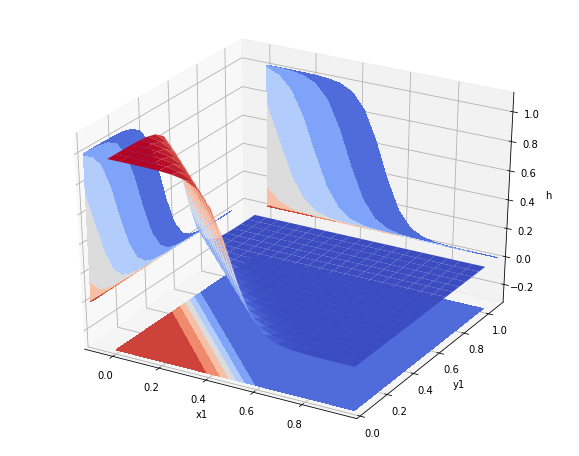

In [8]:
h_nor = MakeModel([10.0, -20.0, -20.0], x1, x2)
nor_vals = ComputeVals(h_nor, span)
PlotValues(span, nor_vals)

### Creating XNOR model

Now we have all pieces in place. To create XNOR we are going to use logical OR of NAND and AND. While above we have created an h_or already, it was taking x1 and x2 as inputs. To create XNOR we are going to re-use the theta values, but use h_nand and h_and as inputs. The way it works is as follows: x1 and x2 are inputs to h_nand and h_and. Once their values are supplied via feed_dict, the values of h_nand and h_and can be computed. Once those are computed, the value of h_xnor is computed by doing neural net OR.

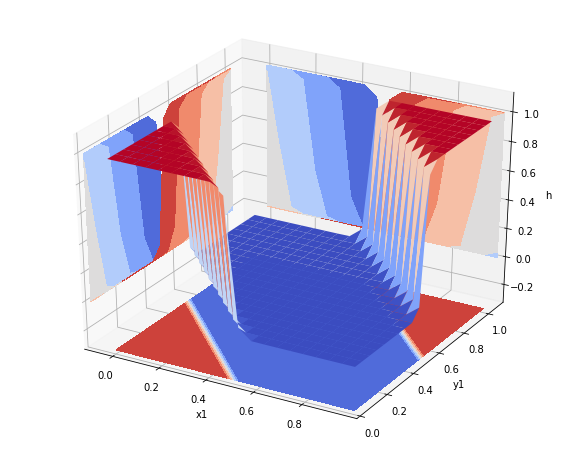

In [9]:
h_xnor = MakeModel([-10.0, 20.0, 20.0], h_nor, h_and)
xnor_vals = ComputeVals(h_xnor, span)
PlotValues(span, xnor_vals)